In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import contrib, gluon, image, nd
import numpy as np
np.set_printoptions(2)

In [4]:
img = image.imread('images/biking.jpg').asnumpy()
h, w = img.shape[0:2]

print(h, w)
X = nd.random.uniform(shape=(1, 3, h, w))  # 构造输入数据
Y = contrib.nd.MultiBoxPrior(X, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
Y.shape

600 956


(1, 2868000, 4)

In [6]:
boxes = Y.reshape((h, w, 5, 4))
boxes[250, 250, 0, :]


[0.03 0.04 0.5  0.79]
<NDArray 4 @cpu(0)>

为了描绘图像中以某个像素为中心的所有锚框，我们先定义 `show_bboxes` 函数以便在图像上画出多个边界框。

In [7]:
# 本函数已保存在d2lzh包中方便以后使用
def show_bboxes(axes, bboxes, labels=None, colors=None):
    def _make_list(obj, default_values=None):
        if obj is None:
            obj = default_values
        elif not isinstance(obj, (list, tuple)):
            obj = [obj]
        return obj

    labels = _make_list(labels)
    colors = _make_list(colors, ['b', 'g', 'r', 'm', 'c'])
    for i, bbox in enumerate(bboxes):
        color = colors[i % len(colors)]
        rect = d2l.bbox_to_rect(bbox.asnumpy(), color)
        axes.add_patch(rect)
        if labels and len(labels) > i:
            text_color = 'k' if color == 'w' else 'w'
            axes.text(rect.xy[0], rect.xy[1], labels[i],
                      va='center', ha='center', fontsize=9, color=text_color,
                      bbox=dict(facecolor=color, lw=0))

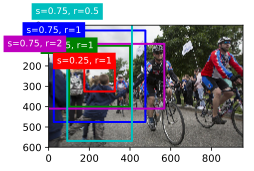

In [8]:
d2l.set_figsize()
bbox_scale = nd.array((w, h, w, h))
fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, boxes[250, 250, :, :] * bbox_scale,
            ['s=0.75, r=1', 's=0.5, r=1', 's=0.25, r=1', 's=0.75, r=2',
             's=0.75, r=0.5'])

In [9]:
contrib.nd.MultiBoxTarget?